In [2]:
#Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#File to load
Test_Data = "Resources/SAMPLES-NFL-PlayByPlay-2009-2018.csv"

#Read the file 
nfl_data = pd.read_csv(Test_Data)
nfl_data.head()


C:\Users\abehr\Anaconda3\envs\ProjectOne\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (95,96,102,103,104) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,yardline_100,game_date,quarter_seconds_remaining,...,fumbled_2_team,fumble_recovery_1_team,fumble_recovery_1_yards,fumble_recovery_2_team,fumble_recovery_2_yards,penalty_team,penalty_player_id,penalty_player_name,penalty_yards,penalty_type
0,46,2009091000,PIT,TEN,PIT,home,TEN,30.0,9/10/09,900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68,2009091000,PIT,TEN,PIT,home,TEN,58.0,9/10/09,893.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92,2009091000,PIT,TEN,PIT,home,TEN,53.0,9/10/09,856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,113,2009091000,PIT,TEN,PIT,home,TEN,56.0,9/10/09,815.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139,2009091000,PIT,TEN,PIT,home,TEN,56.0,9/10/09,807.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Just grab total number of plays
total_plays = nfl_data["play_id"].count()
total_plays

40746

In [4]:
# Create a column for year that game occurred

game_year = pd.DatetimeIndex(nfl_data["game_date"]).year
nfl_data["game_year"] = game_year
nfl_data.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,yardline_100,game_date,quarter_seconds_remaining,...,fumble_recovery_1_team,fumble_recovery_1_yards,fumble_recovery_2_team,fumble_recovery_2_yards,penalty_team,penalty_player_id,penalty_player_name,penalty_yards,penalty_type,game_year
0,46,2009091000,PIT,TEN,PIT,home,TEN,30.0,9/10/09,900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
1,68,2009091000,PIT,TEN,PIT,home,TEN,58.0,9/10/09,893.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
2,92,2009091000,PIT,TEN,PIT,home,TEN,53.0,9/10/09,856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
3,113,2009091000,PIT,TEN,PIT,home,TEN,56.0,9/10/09,815.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
4,139,2009091000,PIT,TEN,PIT,home,TEN,56.0,9/10/09,807.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009


In [5]:
# Code to discover the average yardage of all run plays vs. all pass plays

run_play = nfl_data.loc[nfl_data["play_type"] == "run", :]
run_avg = run_play["yards_gained"].mean()

pass_play = nfl_data.loc[nfl_data["play_type"] == "pass", :]
pass_avg = pass_play["yards_gained"].mean()

print(f'Pass average:', pass_avg, 'Run average:', run_avg)


Pass average: 6.289028176439576 Run average: 4.347287887905098


Text(0, 0.5, 'Avg Yards Gained')

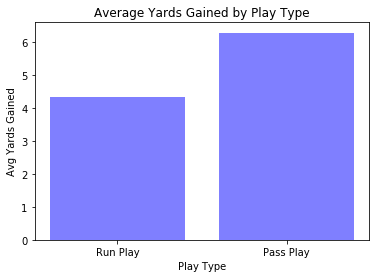

In [6]:
#Create a chart detailing the average yards gained by play type for overall sample size

avg_yards = [run_avg, pass_avg]
x_axis = np.arange(len(avg_yards))

plt.bar(x_axis, avg_yards, color='b', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Run Play", "Pass Play"])

plt.title("Average Yards Gained by Play Type")
plt.xlabel("Play Type")
plt.ylabel("Avg Yards Gained")

In [7]:
#Calculate the turnovers by play type

fumbles = run_play["fumble_lost"].sum()

interceptions = pass_play["interception"].sum()

print(f'Run play fumbles total:', fumbles, 'Pass play interceptions:', interceptions)


Run play fumbles total: 77.0 Pass play interceptions: 338.0


Text(0, 0.5, 'Total Count of Turnover Type')

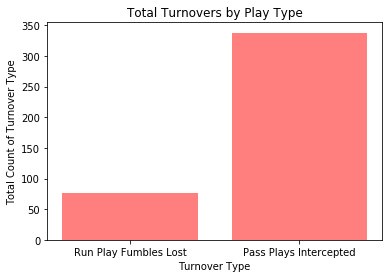

In [8]:
# Construct simple chart for turnovers

Turnovers = [fumbles, interceptions]
x_axis = np.arange(len(Turnovers))

plt.bar(x_axis, Turnovers, color='r', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Run Play Fumbles Lost", "Pass Plays Intercepted"])

plt.title("Total Turnovers by Play Type")
plt.xlabel("Turnover Type")
plt.ylabel("Total Count of Turnover Type")

In [9]:
# Sack vs Tackle for Loss Analysis (play count)

sacks = pass_play["sack"].sum()
tackled_for_loss = run_play["tackled_for_loss"].sum()

print(f'Tackled for Loss - Run:', tackled_for_loss, '; Sacks Taken - Pass', sacks)

Tackled for Loss - Run: 1174.0 ; Sacks Taken - Pass 1090.0


In [10]:
# Sack vs Tackle for Loss Analysis (yardage)

sack_plays = pass_play.loc[pass_play["sack"] == 1, :]
avg_loss_sack = sack_plays["yards_gained"].mean()


tfl_plays = run_play.loc[run_play["tackled_for_loss"] == 1, :]
avg_loss_tfl = tfl_plays["yards_gained"].mean()

print(f'Avg loss when TFL - Run:', avg_loss_tfl, '; Avg loss when sacked - Pass', avg_loss_sack)


Avg loss when TFL - Run: -2.3390264730999144 ; Avg loss when sacked - Pass -6.64331797235023


In [11]:
# Safety Analysis 

safety_run = run_play.loc[run_play["safety"] == 1, :]
safety_pass = pass_play.loc[pass_play["safety"] == 1, :]

safety_count_run = safety_run["play_id"].count()
safety_count_pass = safety_pass["play_id"].count()

print(f'Safeties via Run:', safety_count_run, '; Safeties via Pass', safety_count_pass)

Safeties via Run: 3 ; Safeties via Pass 6


In [12]:
# Annual Average Yards gained by run play
annual_run_yd = run_play.groupby("game_year")["yards_gained"].mean()
annual_run_yd

game_year
2009    4.518600
2010    4.314010
2011    4.141944
2012    4.074541
2013    4.461591
2014    4.404235
2015    4.045455
2016    4.254495
2017    4.305596
2018    4.640161
Name: yards_gained, dtype: float64

In [13]:
# Annual Average Yards gained by pass play
annual_pass_yd = pass_play.groupby("game_year")["yards_gained"].mean()
annual_pass_yd

game_year
2009    6.346369
2010    6.653571
2011    6.027444
2012    5.833333
2013    6.218360
2014    6.469638
2015    6.785332
2016    6.388745
2017    6.038225
2018    6.603712
Name: yards_gained, dtype: float64